### Val Roseg Water Supply
The water supply to the fountain was intermittent causing long melt and short freezing periods. Also due to freezing and melting inside the supply pipeline, the fountain water discharge varied a lot.
In an ideal scenario, the pipeline discharge can be measured periodically and the fountaiin discharge estimated. Given the unavailability of this data, fountain discharge of 0.5 litre/s was assumed.

In [187]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import division
import datetime

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
import pandas as pd
import numpy as np
from datetime import timedelta,date, time
from matplotlib import pyplot as plt
def GetTime(sec):
    sec = timedelta(seconds=sec)
    d = datetime(1,1,1) + sec

    print("DAYS:HOURS:MIN:SEC")
    print("%d:%d:%d:%d" % (d.day-1, d.hour, d.minute, d.second))

In [189]:
df = pd.read_csv('../data/interim/roseg_measurements.csv', parse_dates=['time'])
del df['doy']
df.head()

,time,temp,rh,ws,height,water
0,2016-11-17 14:00:00,3.43,68.98,1.67,5.378824,1.0
1,2016-11-17 16:00:00,-0.83,89.60,0.34,5.507915,1.0
2,2016-11-18 10:00:00,4.74,53.88,2.29,5.400339,1.0
3,2016-11-18 12:00:00,4.56,56.59,2.42,5.540188,1.0
4,2016-11-18 14:00:00,1.07,86.50,3.32,5.529431,1.0


### Estimating total water consumption

In [190]:
rate=0.5
print('Assuming constant discharge of %0.2f litre/s' % (rate))

Assuming constant discharge of 0.50 litre/s


In [191]:
df['delta_time'] = (df['time']-df['time'].shift()).fillna(0)
df['delta_height'] = (df['height']-df['height'].shift()).fillna(0)
df['growth_rate'] = (df['delta_height']*100)/(df['delta_time'].apply(lambda x: x.total_seconds()/3600))
df['delta_time']=df['delta_time'].apply(lambda x: x.total_seconds())

In [192]:
df['water_used']=df['delta_time']*df['water']*rate/1000
total_water=df['water_used'].sum()
print('The fountain worked approximately for %d days from 17th November 2016 to 7th April 2017(in 141 days)' %(df['water_used'].sum()*1000//3600//24))
print(' %d cubic metres water used' % (total_water))

The fountain worked approximately for 17 days from 17th November 2016 to 7th April 2017(in 141 days)
 1540 cubic metres water used


In [193]:
df['water_used']=df['delta_time']*df['water']/3600

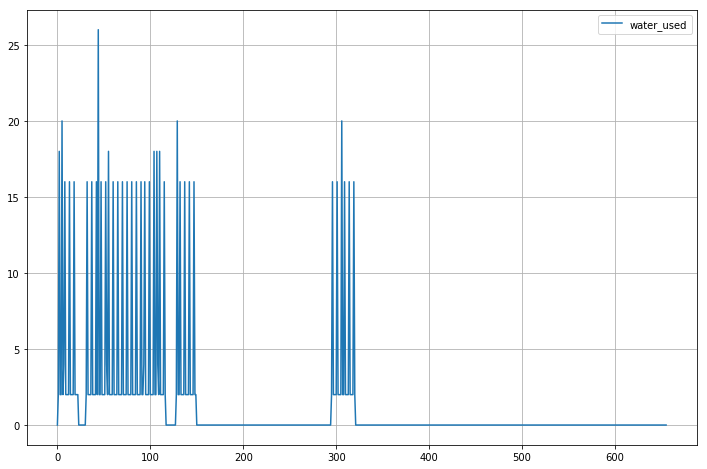

In [194]:
df[['water_used']].plot(figsize=(12,8), grid=True)

### Freezing Efficiency
Using the total amount of water consumed by Ice Stupa, we can estimate efficiency of freezing.

In [195]:
print(' The maximum height of the Ice Stupa was %d m and the base diameter was 8.95 m' % (df['height'].max()))

 The maximum height of the Ice Stupa was 9 m and the base diameter was 8.95 m


In [196]:
frozen_water=8.95*8.95*3.14/12*df['height'].max()*100/90
print(' So the the water used is %d cubic meters' % (frozen_water))

 So the the water used is 223 cubic meters


In [197]:
lost_water=total_water-frozen_water
print(' So %d cubic meters was lost due to evaporation and melting processes' % (lost_water))
print(' The efficiency was %d percent' % (frozen_water/total_water*100))

 So 1316 cubic meters was lost due to evaporation and melting processes
 The efficiency was 14 percent


This low efficiency could be because the fountain might not have been operational most of the nights due to freezing of pipeline..